<a href="https://colab.research.google.com/github/ahujaravinder022/electricity-theft-detection-with-self-attention/blob/master/cross_validation_and_Grid_Search_in_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# fit MLP to dataset and print error
def fit_model(X, y):
	# design network
	model = Sequential()
	model.add(Dense(10, input_dim=1))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	model.fit(X, y, epochs=100, batch_size=len(X), verbose=0)
	# forecast
	yhat = model.predict(X, verbose=0)
	print(mean_squared_error(y, yhat[:,0]))

# create sequence
length = 10
sequence = [i/float(length) for i in range(length)]
# create X/y pairs
df = DataFrame(sequence)
df = concat([df.shift(1), df], axis=1)
df.dropna(inplace=True)
# convert to MLP friendly format
values = df.values
X, y = values[:,0], values[:,1]
# repeat experiment
repeats = 10
for _ in range(repeats):
	fit_model(X, y)

0.019346387214993616
0.003212768830256592
0.10325242600741885
3.904457702683416e-06
0.0034833264759716012
0.15452900370251357
0.01476246893749737
0.007419720629967256
0.11356865276091963
0.009061726684423003


In [4]:
# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy

# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("/content/pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7202153146266937


Grid Search Algorithm

In [5]:
# MLP for Pima Indians Dataset with grid search via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
	model.add(Dense(8, kernel_initializer=init, activation='relu'))
	model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("/content/pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.763068 using {'batch_size': 5, 'epochs': 150, 'init': 'uniform', 'optimizer': 'adam'}
0.679798 (0.051405) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.695391 (0.054119) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.731721 (0.031687) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.722698 (0.024742) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.716196 (0.024732) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.722732 (0.034035) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.721441 (0.047339) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.717554 (0.035957) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.730507 (0.034619) with: {'batch_size': 5, 'epochs': 100, 'init': 'normal', 'opti

Regression With Keras Model

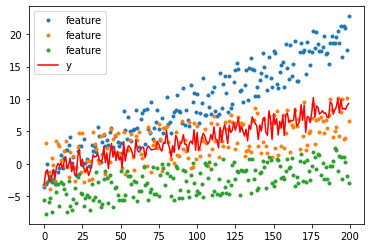

Model: "sequential_294"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_875 (Dense)            (None, 128)               512       
_________________________________________________________________
dense_876 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_877 (Dense)            (None, 8)                 264       
_________________________________________________________________
dense_878 (Dense)            (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________
67/67 [==============================] - 0s 1ms/step - loss: 8.8357
0.35696383050277253


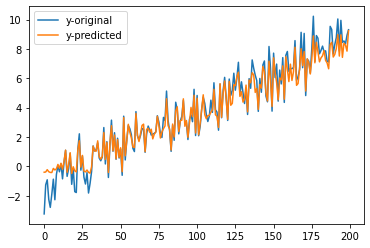

20.908674310085452


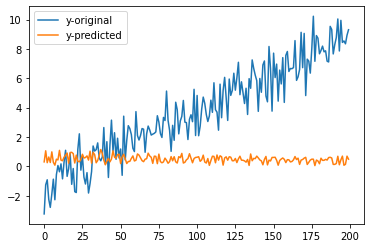

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

random.seed(123)
def CreateDataset(N):
 a,b,c,y = [],[],[],[]
 for i in range(N):    
  aa = i/10+random.uniform(-4,3)
  bb = i/30+random.uniform(-4,4)
  cc = i/40+random.uniform(-3,3)-5
  yy = (aa+bb+cc/2)/3
  a.append([aa])
  b.append([bb])
  c.append([cc])
  y.append([yy])
 return np.hstack([a,b,c]), np.array(y)

N = 200
x,y = CreateDataset(N)
x_ax = range(N)
plt.plot(x_ax, x, 'o', label="feature", markersize=3)
plt.plot(x_ax, y, lw=1.5, color="red", label="y")
plt.legend()
plt.show()

def BuildModel():
 model = Sequential()
 model.add(Dense(128, input_dim=3,activation='relu')) 
 model.add(Dense(32, activation='relu')) 
 model.add(Dense(8,activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 return model

BuildModel().summary()
regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=100,batch_size=3)
regressor.fit(x,y) 

y_pred = regressor.predict(x)
mse_krr = mean_squared_error(y, y_pred)
print(mse_krr)

plt.plot(y, label="y-original")
plt.plot(y_pred, label="y-predicted")
plt.legend()
plt.show()

model = BuildModel()
model.fit(x, y, verbose=False, shuffle=False)
y_krm = model.predict(x)
mse_krm=mean_squared_error(y, y_krm)
print(mse_krm)

plt.plot(y, label="y-original")
plt.plot(y_krm, label="y-predicted")
plt.legend()
plt.show()